In [2]:
import numpy as np 
import pandas as pd 
import re

In [8]:
import json
import pandas as pd

# Load JSON data
file_path = r"D:\CSC\7-seventh semester\GP\grad\AI04-Grad\datasets\intents.json"
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Verify structure and process each intent
if 'intents' in data and isinstance(data['intents'], list):
    processed_data = {
        "tag": [],
        "patterns": [],
        "emotion": [],
        "responses": []
    }

    for intent in data['intents']:
        # Skip if the intent is a list (malformed entry)
        if isinstance(intent, list):
            print("Warning: Skipping malformed intent:", intent)
            continue

        # Safely access each field with defaults
        processed_data["tag"].append(intent.get("tag", ""))
        processed_data["patterns"].append(intent.get("patterns", []))
        processed_data["emotion"].append(intent.get("emotion", "neutral"))
        processed_data["responses"].append(intent.get("responses", []))

    # Convert processed data into a DataFrame
    df = pd.DataFrame(processed_data)

    # Display the first few rows
    print(df.head())
else:
    print("Error: JSON structure is invalid or 'intents' key is missing.")


         tag                                           patterns  emotion  \
0   greeting  [Hi, Hey, Is anyone there?, Hi there, Hello, H...  neutral   
1    morning                                     [Good morning]    happy   
2  afternoon                                   [Good afternoon]  neutral   
3    evening                                     [Good evening]  neutral   
4      night                                       [Good night]  neutral   

                                           responses  
0  [Hello there. Tell me how are you feeling toda...  
1  [Good morning. I hope you had a good night's s...  
2           [Good afternoon. How is your day going?]  
3             [Good evening. How has your day been?]  
4  [Good night. Get some proper sleep., Good nigh...  


Total Intents: 207
Unique Tags: 83
Unique Emotions: 21

Patterns per Intent:
  Max: 13
  Min: 1
  Average: 2.1207729468599035

Responses per Intent:
  Max: 6
  Min: 1
  Average: 1.5845410628019323

Most Frequent Words in Patterns:
[('I', 169), ("I'm", 57), ('to', 55), ('feel', 43), ('What', 37), ('is', 36), ('you', 34), ('so', 33), ('about', 28), ('a', 28)]

Most Frequent Words in Responses:
[('to', 313), ('you', 179), ('and', 172), ('a', 159), ('of', 116), ('the', 110), ('can', 106), ('your', 97), ('or', 94), ('in', 90)]


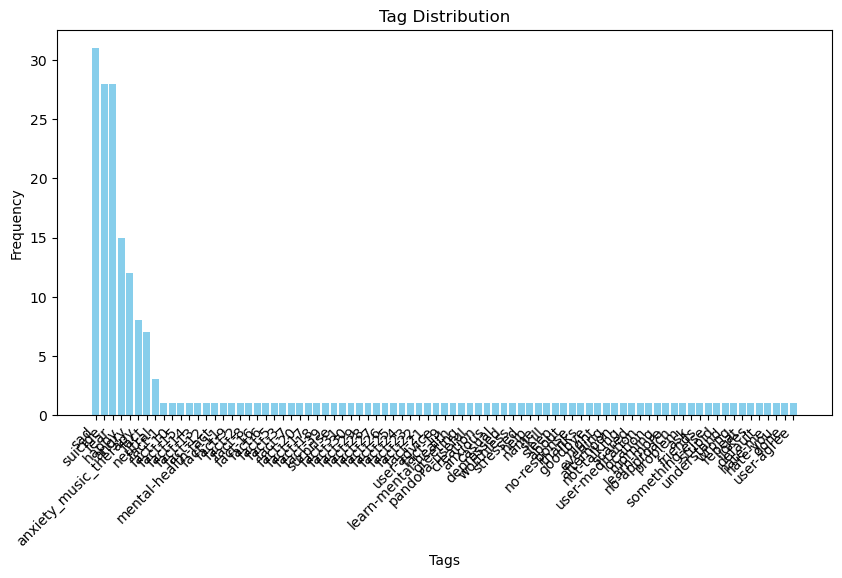

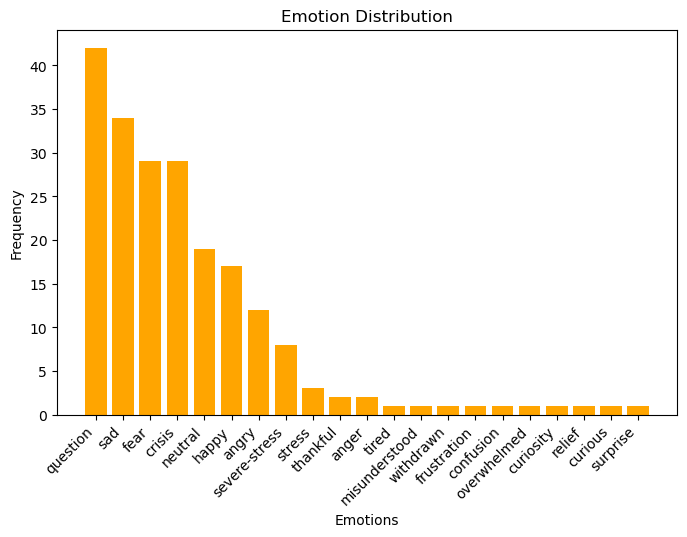

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load JSON Data
file_path = r"../datasets/intents.json"  
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Process the data into a DataFrame
processed_data = {
    "tag": [],
    "patterns": [],
    "emotion": [],
    "responses": []
}

if 'intents' in data and isinstance(data['intents'], list):
    for intent in data['intents']:
        if isinstance(intent, list):  # Skip malformed entries
            continue
        processed_data["tag"].append(intent.get("tag", ""))
        processed_data["patterns"].append(intent.get("patterns", []))
        processed_data["emotion"].append(intent.get("emotion", "neutral"))
        processed_data["responses"].append(intent.get("responses", []))

# Convert processed data into a DataFrame
df = pd.DataFrame(processed_data)

# --- EDA ---

# Overview of the data
print("Total Intents:", len(df))
print("Unique Tags:", df['tag'].nunique())
print("Unique Emotions:", df['emotion'].nunique())

# Patterns and Responses Analysis
patterns_per_intent = df['patterns'].apply(len)
responses_per_intent = df['responses'].apply(len)

print("\nPatterns per Intent:")
print("  Max:", patterns_per_intent.max())
print("  Min:", patterns_per_intent.min())
print("  Average:", patterns_per_intent.mean())

print("\nResponses per Intent:")
print("  Max:", responses_per_intent.max())
print("  Min:", responses_per_intent.min())
print("  Average:", responses_per_intent.mean())

# Distribution of Tags
tag_counts = df['tag'].value_counts()

# Distribution of Emotions
emotion_counts = df['emotion'].value_counts()

# Most Frequent Words in Patterns and Responses
all_patterns = [item for sublist in df['patterns'] for item in sublist]
all_responses = [item for sublist in df['responses'] for item in sublist]
word_counts_patterns = Counter(" ".join(all_patterns).split())
word_counts_responses = Counter(" ".join(all_responses).split())

print("\nMost Frequent Words in Patterns:")
print(word_counts_patterns.most_common(10))

print("\nMost Frequent Words in Responses:")
print(word_counts_responses.most_common(10))

# --- Visualizations ---

# Tag Distribution
plt.figure(figsize=(10, 5))
plt.bar(tag_counts.index, tag_counts.values, color='skyblue')
plt.title("Tag Distribution")
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

# Emotion Distribution
plt.figure(figsize=(8, 5))
plt.bar(emotion_counts.index, emotion_counts.values, color='orange')
plt.title("Emotion Distribution")
plt.xlabel("Emotions")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
import torch
from torchvision import models

# Load the architecture
model = models.efficientnet_b0(pretrained=False)

# Modify the classifier to match the checkpoint
num_classes = 7  # Number of classes used during training
model.classifier[1] = torch.nn.Linear(in_features=1280, out_features=num_classes)

# Load the saved state dictionary
checkpoint_path = r"../videoRecognition/checkpoints/efficientnet_model.pth"
state_dict = torch.load(checkpoint_path, map_location=torch.device('cpu'))

# Load state dictionary into the model
model.load_state_dict(state_dict)
model.eval()

print("Model loaded successfully!")

Model loaded successfully!


c:\Users\Moufid\anaconda3\envs\ds\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Moufid\anaconda3\envs\ds\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Moufid\AppData\Local\Temp\ipykernel_16356\2635688990.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_

In [2]:
import torch
from torchvision import models

# Load the architecture
model = models.efficientnet_b0(pretrained=False)

# Modify the classifier to match the checkpoint
num_classes = 7  # Number of classes used during training
model.classifier[1] = torch.nn.Linear(in_features=1280, out_features=num_classes)

# Load the saved state dictionary
checkpoint_path = r"../audio/CNNmodel.pth"
state_dict = torch.load(checkpoint_path, map_location=torch.device('cpu'))

# Load state dictionary into the model
model.load_state_dict(state_dict)
model.eval()

print("Model loaded successfully!")



Model loaded successfully!


C:\Users\Moufid\AppData\Local\Temp\ipykernel_16356\2635688990.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location=torc

In [3]:
import torch
from torchvision import models

# Load the architecture
model = models.efficientnet_b0(pretrained=False)

# Modify the classifier to match the checkpoint
num_classes = 7  # Number of classes used during training
model.classifier[1] = torch.nn.Linear(in_features=1280, out_features=num_classes)

# Load the saved state dictionary
checkpoint_path = r"../text/checkpoints/bert_model.pth"
state_dict = torch.load(checkpoint_path, map_location=torch.device('cpu'))

# Load state dictionary into the model
model.load_state_dict(state_dict)
model.eval()

print("Model loaded successfully!")



Model loaded successfully!


C:\Users\Moufid\AppData\Local\Temp\ipykernel_16356\2635688990.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location=torc

In [4]:
def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s)  # Keep only alphabets and apostrophes
    s = s.lower()  # Convert to lowercase
    s = s.split()  # Split into words
    s = " ".join(s)  # Rejoin words to ensure clean spacing
    return s

# Apply preprocessing to the patterns
df['patterns'] = df['patterns'].apply(preprocess_text)
df['tag'] = df['tag'].apply(preprocess_text)
df


NameError: name 'df' is not defined

In [50]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no response', 'neutral', 'about', 'skill', 'creation',
       'name', 'help', 'sad', 'stressed', 'worthless', 'depressed',
       'happy', 'casual', 'anxious', 'not talking', 'sleep', 'scared',
       'understand', 'done', 'suicide', 'hate you', 'hate me', 'default',
       'jokes', 'repeat', 'wrong', 'stupid', 'location', 'something else',
       'friends', 'ask', 'problem', 'no approach', 'learn more',
       'user agree', 'meditation', 'user meditation', 'pandora useful',
       'user advice', 'learn mental health', 'mental health fact', 'fact',
       'angry', 'fear', 'surprise'], dtype=object)

In [12]:
len(df['tag'].unique())


50

In [15]:
X = df['patterns']
y = df['tag']


In [24]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [26]:
# Tokenization and Encoding the Data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = 128  # Max sequence length

def encode_texts(texts, max_len):
    input_ids = []
    attention_masks = []
    
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)


# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_labels = len(np.unique(y_encoded))

# Encode the patterns
input_ids, attention_masks = encode_texts(X, max_len)
labels = torch.tensor(y_encoded)

# Splitting the dataset into training and validation
dataset = torch.utils.data.TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
validation_dataloader = DataLoader(val_dataset, batch_size=16)

# Model and Optimization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=2e-5)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\Moufid\anaconda3\envs\ds\lib\site-packages\transformers\tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


model.safetensors:  64%|######4   | 283M/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Moufid\anaconda3\envs\ds\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
